<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_out_2020/blob/main/PSD_GRAIN_NOT_GRAIN_out_28_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [2]:
!pip install mahotas

In [3]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [4]:
import mahotas.features.texture as mht
import mahotas.features

In [5]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020/
%cd marquesgabi_out_2020

from Get_PSDArea import PSDArea
from histogram import PSD
from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_out_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_out_2020


In [6]:
!ls

Areas_ImageJ.csv		 imageJ_jpg.zip
Areas_ImageJ.xlsx		 IMAGEJ_Zuados.zip
Doutorado			 PSD_GRAIN_NOT_GRAIN_out_09_2020.ipynb
GetBetterSegm.py		 PSD_GRAIN_NOT_GRAIN_out_19_2020.ipynb
Get_PSDArea.py			 PSD_USA_ROTINAS_out_05_2020.ipynb
Histogram_PSD_out_19_2020.ipynb  __pycache__
Histogram_PSD_out_23_2020.ipynb  README.md
histogram.py


In [7]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado


In [8]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [9]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

fatal: destination path 'Doutorado' already exists and is not an empty directory.


In [10]:
!git clone https://github.com/ucfilho/marquesgabi_set_2020
%cd marquesgabi_set_2020

fatal: destination path 'marquesgabi_set_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_set_2020


In [11]:
from big_segment import Segmenta  # got image provided segmented
from ANN_FIND_GRAIN import AnnGrain  # got image provided segmented
from psd_mahotas import Mahotas

In [12]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
ANN_dat=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [ANN_dat, df_new]
  ANN_dat= pd.concat(frames, ignore_index=True)

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_set_2020/Doutorado


In [13]:
df=Segmenta(img)


In [14]:
print(df)

    Width           0           1  ...         781         782         783
0     118   68.715027   63.545822  ...   92.831085   98.288986   98.113182
1     115   41.183437   43.316063  ...  109.278625  113.621239  111.377609
2     186  180.092392  112.913521  ...    0.000000    0.000000    0.000000
3     130   91.516930   93.883316  ...    7.411834    7.366155    7.474083
4     169   56.335209   56.850037  ...    5.678267    7.616435    8.377192
..    ...         ...         ...  ...         ...         ...         ...
45    182   71.846161   70.130180  ...   86.568054   88.828407   90.532547
46    123   80.960411   86.152954  ...   86.764824   87.506645   86.008598
47    138   87.697968   63.137573  ...   48.356857   46.882797   45.749840
48    123  100.201080  101.029030  ...    8.796022    9.377686    9.990946
49    148  114.582916  118.914543  ...   91.555161   91.869255   99.131485

[150 rows x 785 columns]


In [15]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 11.7437 - accuracy: 0.4519 
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 1.7139 - accuracy: 0.4956
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2290 - accuracy: 0.4956
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 0.7082 - accuracy: 0.5889
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0537 - accuracy: 0.5015
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8315 - accuracy: 0.5248
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2281 - accuracy: 0.5656
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 1.7915 - accuracy: 0.4956
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8722 - accuracy: 0.5394
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.6472
Epoch 1

In [16]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


Epoch 1/200
11/11 [==============================] - 0s 3ms/step - loss: 11.5516 - accuracy: 0.4898
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 3.7005 - accuracy: 0.4956
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 1.5944 - accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0540 - accuracy: 0.5190
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 1.1792 - accuracy: 0.4956
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4683 - accuracy: 0.7085
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.6618
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9612 - accuracy: 0.4985
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4254 - accuracy: 0.7464
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.8513
Epoch 11

In [17]:
print(confusion_matrix)

Predicted   0   1
Actual           
0          72   0
1           4  71


In [18]:
df.shape

(150, 785)

In [19]:
# open file to get df 
# use df and ANN to get grains and no grains
# use grains to obtain psd

In [20]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_set_2020/Doutorado/Doutorado


In [21]:
k=0
for Item in img_name:
  print(k,Item)
  k=k+1

img=ww[21]


0 Fotos_Grandes-3cdAmostra/Q6-8-4.jpg
1 Fotos_Grandes-3cdAmostra/Q6-5-3.jpg
2 Fotos_Grandes-3cdAmostra/Q6-7-4.jpg
3 Fotos_Grandes-3cdAmostra/Q6-8-2.jpg
4 Fotos_Grandes-3cdAmostra/Q6-3-2.jpg
5 Fotos_Grandes-3cdAmostra/Q6-7-2.jpg
6 Fotos_Grandes-3cdAmostra/Q6-4-4.jpg
7 Fotos_Grandes-3cdAmostra/Q6-9-5.jpg
8 Fotos_Grandes-3cdAmostra/Q6-2-5.jpg
9 Fotos_Grandes-3cdAmostra/Q6-8-3.jpg
10 Fotos_Grandes-3cdAmostra/Q6-9-3.jpg
11 Fotos_Grandes-3cdAmostra/Q6-1-2.jpg
12 Fotos_Grandes-3cdAmostra/Q6-6-3.jpg
13 Fotos_Grandes-3cdAmostra/Q6-3-4.jpg
14 Fotos_Grandes-3cdAmostra/Q6-1-4.jpg
15 Fotos_Grandes-3cdAmostra/Q6-6-2.jpg
16 Fotos_Grandes-3cdAmostra/Q6-4-3.jpg
17 Fotos_Grandes-3cdAmostra/Q6-7-3.jpg
18 Fotos_Grandes-3cdAmostra/Q6-2-2.jpg
19 Fotos_Grandes-3cdAmostra/Q6-9-2.jpg
20 Fotos_Grandes-3cdAmostra/Q6-1-5.jpg
21 Fotos_Grandes-3cdAmostra/Q6-6-5.jpg
22 Fotos_Grandes-3cdAmostra/Q6-2-1.jpg
23 Fotos_Grandes-3cdAmostra/Q6-5-2.jpg
24 Fotos_Grandes-3cdAmostra/Q6-4-1.jpg
25 Fotos_Grandes-3cdAmostra/Q6-3-1.

In [22]:
df=Segmenta(img)

In [23]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 

Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 12.0789 - accuracy: 0.4548
Epoch 2/200
11/11 [==============================] - 0s 3ms/step - loss: 1.3850 - accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2138 - accuracy: 0.5015
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 1.6738 - accuracy: 0.4956
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0725 - accuracy: 0.4956
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0298 - accuracy: 0.5015
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8093 - accuracy: 0.5015
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5122 - accuracy: 0.7114
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5538 - accuracy: 0.5364
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.7813
Epoch 11

In [24]:
# print(y_pred.ravel())

In [25]:
Grain=[]; Ind=[]; Size=[]
k=0
for item in y_pred:
  if(item == 0):
    Ind.append(k)
  k=k+1

df = df.reset_index(drop=True)

df_size = df.drop(df.index[Ind])

Width=np.array(df_size['Width'])

# print(Width)

# print(df_size.shape)

In [26]:
# pd.set_option('display.max_rows', None)
# print(df_size)

In [27]:
# print(len(y_pred.ravel()))

In [28]:
df.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,108,67.200279,67.061729,67.252396,64.248283,62.964336,67.041153,64.445808,61.603565,60.831276,77.475998,83.973923,85.625504,85.818924,82.451302,82.735252,84.796974,84.917686,83.133057,84.714676,84.123459,84.510284,82.326477,77.305893,57.480110,38.530861,54.737995,56.122082,52.555553,65.853226,64.786011,63.997246,62.083675,63.688610,67.415634,67.444443,65.596703,57.041149,71.192047,79.399170,...,58.624146,101.400543,147.120697,147.135788,153.198883,159.252396,152.562408,97.582993,89.104248,93.031540,92.115219,91.853218,176.032913,220.386810,181.421112,184.550064,203.381348,89.802467,55.168724,95.674896,101.351166,64.648834,53.858711,27.647463,22.628258,61.353905,137.961578,169.751709,199.278442,193.403290,158.899857,157.703705,134.880646,119.611794,109.555550,87.781891,95.914948,96.669403,95.695473,94.751709
1,102,75.575943,77.547485,77.867752,76.542107,80.366020,87.123421,90.010002,92.423691,94.898895,99.696289,104.418694,105.585175,108.229149,111.762405,112.788170,114.287590,115.245682,115.851608,113.395622,102.173019,71.356026,66.533264,78.525955,71.533264,104.176857,131.079590,142.650146,137.755875,75.187630,77.337570,77.584023,78.010002,80.398323,83.883125,87.890045,91.009613,93.420998,97.670898,102.263382,...,71.156494,73.773178,74.072289,71.327957,71.390625,74.890808,76.006165,74.742027,72.409081,62.582855,57.967712,55.245682,86.933495,92.485970,92.054993,72.271828,41.339874,45.309113,45.483665,41.862751,42.365631,42.123421,47.335644,49.167248,50.096119,51.883125,57.680901,58.139954,60.086895,62.332954,62.564407,61.402538,60.561714,65.447525,65.461746,61.584778,56.300659,59.500198,57.645531,53.900814
2,189,115.384087,119.803848,123.614548,121.559677,113.529488,109.652954,110.909470,113.403290,116.356651,115.135796,114.677658,117.983536,132.949249,151.240051,136.139923,92.855972,86.204391,76.813446,70.164604,64.063110,58.698215,55.650208,54.230457,51.903980,50.418381,51.990398,52.803844,52.507545,124.566528,127.696861,134.574753,137.123459,118.799721,109.814804,110.816193,114.561050,116.732513,115.621399,118.784637,...,98.960220,93.909477,88.834023,87.366249,90.816200,92.893005,91.238686,95.921799,95.211250,55.658440,60.500687,65.650208,124.486969,111.973946,81.825790,81.159119,82.632378,82.407410,84.993149,88.930038,91.170097,91.203018,91.842247,93.087784,91.492455,85.283951,83.611801,89.757195,95.009605,94.002747,94.578873,96.694107,97.046646,98.267494,97.257889,95.493820,82.725647,52.670784,59.112480,59.982166
3,100,55.044800,56.771202,92.915199,99.921600,101.460800,103.264008,105.827202,106.987206,107.382401,106.944000,107.619202,105.267204,104.407997,103.403198,104.444809,105.487999,106.281601,106.451202,114.647995,131.176010,136.812805,138.355194,139.807983,141.670410,144.908798,152.192001,159.614410,165.107208,55.555199,58.270401,96.956802,99.764801,101.003197,102.185600,102.118401,104.126404,104.697594,105.871994,105.019188,...,66.979202,61.062401,58.615997,56.774399,55.353600,53.711998,48.771198,47.227200,33.564800,43.697598,103.049591,117.417603,70.273598,66.204796,63.737602,63.217602,59.817596,59.134399,72.748802,85.681602,92.918404,101.020798,109.374405,109.041595,102.398399,87.367996,74.833595,68.540802,67.627205,67.201599,66.783997,64.409599,62.996803,63.521599,59.267197,52.062401,35.966400,44.952000,89.119995,99.235199
4,180,83.203949,94.643951,100.599518,103.418282,109.206924,114.899261,119.971367,121.688400,117.168404,105.356560,39.952099,43.460743,45.696793,67.972351,112.264214,135.491364,145.969406,164.432114,166.639511,141.278534,103.257294,106.164459,112.042473,117.602974,117.429634,113.692360,112.992096,119.030128,83.481491,91.380745,97.665192,103.407921,108.929886,114.656303,119.732857,120.470627,112.517052,91.924934,31.2029

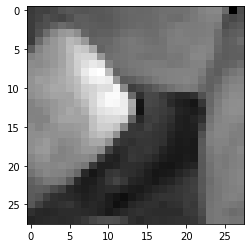

In [29]:
Size=28
qual_img=7
L = Width[qual_img]
data=np.array(df_size.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")

In [30]:
'''
it is not change the size? why? ????

size = 20
img1200=cv2.resize(img28,(Size,Size), interpolation = cv2.INTER_AREA)
plt.imshow(img1200, cmap = "gray")
'''

'\nit is not change the size? why? ????\n\nsize = 20\nimg1200=cv2.resize(img28,(Size,Size), interpolation = cv2.INTER_AREA)\nplt.imshow(img1200, cmap = "gray")\n'

In [31]:
df_getBetter = GetBetter(img)
#df_getBetter = GetBetter(data)

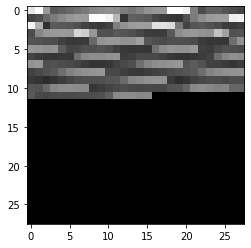

In [51]:
qual_img =49
data=np.array(df_getBetter.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
plt.imshow(img28, cmap = "gray")


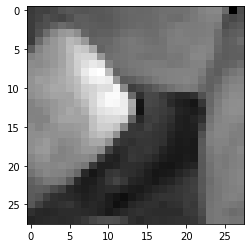

In [33]:
plt.imshow(Foto, cmap = "gray")


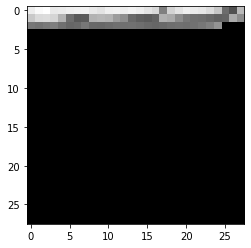

In [34]:
plt.imshow(img28, cmap = "gray")

In [35]:
mean_value = np.mean(img)
img_new = img.copy()

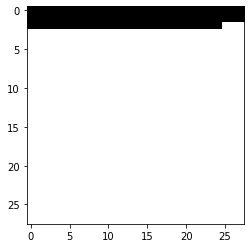

In [36]:

for i in range(28):
  for j in range(28):
    if img[i,j] < mean_value:
      img_new[i,j] = 255
    else:
      img_new[i,j] = 0

img28=cv2.resize(img_new,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")


In [37]:
L = Width[qual_img]
Area = np.sum(img_new) / (255.0 * 28 * 28)* L*L
print(Area)

26527.48979591837


In [38]:
Area_All, Diameter_All=PSDArea(df_size) 


In [39]:
df_size.shape

(147, 785)

In [40]:
# print(Area_All)
print(Diameter_All)

[1.0441322772859976, 0.9202365101633908, 1.6721913704263902, 1.0091645625401795, 1.6220030993802572, 1.765989965090816, 0.8668816105460294, 1.1637969047101393, 1.372463805054644, 1.737421684400083, 1.3935352537567816, 1.367379621730681, 1.1109925413000319, 1.5920838330870288, 1.2400215621802124, 1.4367646348892205, 1.5864748566771294, 0.899853203855231, 1.1166884589142698, 1.1158313264709305, 1.5109592659467708, 1.5001782779597426, 1.3995576624051358, 1.4491961830717957, 1.7017274133581486, 1.6487983502557528, 1.5636956450232589, 1.8137928043584128, 1.51845410492594, 1.44971656320321, 1.011669892340984, 1.3690681030956704, 1.7959967910843628, 1.5746350979055572, 1.0617088066199303, 1.1556426611527861, 1.3935012978057109, 1.1698821966172528, 1.1989133965225887, 1.42973700322195, 1.1875264345512841, 1.33885418808784, 1.4826902255635035, 0.9370990613957646, 1.66259515073088, 1.2895326039003663, 1.2008281577069195, 1.687100268632883, 1.9085383560835356, 1.5087771208906144, 1.74332931397662

In [41]:
'''
d = 1.6343255246592054
r = d / 2.0
Area = np.pi * d**2 / 4; print('Area=',Area)
'''

"\nd = 1.6343255246592054\nr = d / 2.0\nArea = np.pi * d**2 / 4; print('Area=',Area)\n"

In [42]:
diam = Diameter_All.copy()
PSD_value = PSD(diam)
print(PSD_value)

[  0   0   0   0   0   1  13  24 109]


In [43]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
df_imageJ = pd.read_csv(PSD_imageJ)
print(df_imageJ.head(3))

fatal: destination path 'marquesgabi_out_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_set_2020/Doutorado/Doutorado/marquesgabi_out_2020
  Unnamed: 0 Unnamed: 1        Unnamed: 2
0                  Area                 d
1          1      2,001  50.4752649569572
2          2      0.820  1.02179080270499


In [44]:
df_imageJ.shape

(25, 3)

In [45]:
df_imageJ['Unnamed: 1']
Area = []; k = 0
diam = []
for item in df_imageJ['Unnamed: 1']:
  if k > 0:
    value =item.replace(',','.')
    Area.append(float(value))
    d = (4*float(value)/np.pi)**0.5
    diam.append(d)
  k = k +1
PSD_new = pd.DataFrame({'Area': Area, 'Diam':diam})
print(PSD_new)

     Area      Diam
0   2.001  1.596168
1   0.820  1.021791
2   1.270  1.271619
3   0.958  1.104429
4   1.162  1.216349
5   2.014  1.601345
6   1.078  1.171560
7   1.234  1.253466
8   1.262  1.267607
9   1.347  1.309601
10  1.313  1.292967
11  2.449  1.765832
12  1.445  1.356404
13  1.209  1.240704
14  3.564  2.130217
15  1.590  1.422832
16  0.891  1.065109
17  1.329  1.300821
18  1.403  1.336546
19  0.626  0.892775
20  1.650  1.449429
21  1.551  1.405274
22  2.118  1.642170
23  1.194  1.232983


In [46]:
PSD_new = PSD(PSD_new['Diam'])
print(PSD_new)

[ 0  0  0  0  0  0  1  4 19]
